In [3]:
import os
import sys
import time
import struct
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import libMaker as lm

In [23]:
importlib.reload(lm)

/workspaces/libMaker/libMaker.py:631: SyntaxWarning: invalid escape sequence '\S'
  Mix				MX


<module 'libMaker' from '/workspaces/libMaker/libMaker.py'>

In [5]:
lm.replace_str_in_filenames(directory='data/asd/Allied_01_14_2025', old_str='FFG', new_str='FLG')

0 filenames replaced.


In [6]:
lm.search_for_ASD_files(source='data/asd/', destination='data/')

Searching data/asd/ and subdirectories for ASD files.
Number of ASD files found: 3614
Filenames saved in data/filenames_asd.csv


In [33]:
fname_csv = 'data/filenames_asd.csv'
df = pd.read_csv(fname_csv, index_col = False)
filepath = df.iloc[521]['ASD fname']
#print(filepath)

data/asd/Allied_01_14_2025/Chas_lat_L_1G_H_N_00000.asd


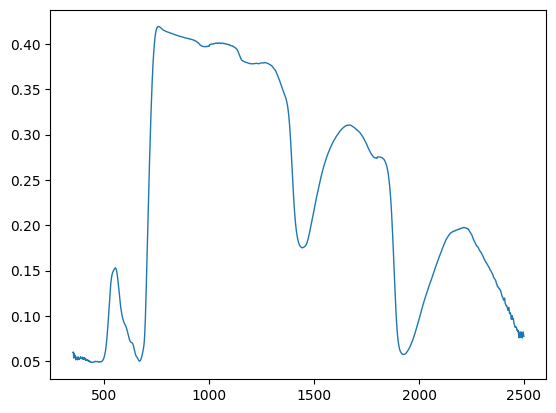

In [34]:
s = lm.read(filepath)

fname_new = 'UPWINS'+\
                    '_'+\
                    s.metadata['genus']+\
                    '_'+\
                    s.metadata['species']+\
                    '_'+\
                    s.metadata['principal_part_code']+\
                    '_'+\
                    s.metadata['age_code']+\
                    '_'+\
                    s.metadata['health_code']+\
                    '_'+\
                    s.metadata['bloom_code']+\
                    '_'+\
                    s.metadata['DateTimeUniqueIdentifier']+\
                    '.asd'

#print(fname_new)
print(filepath)

plt.plot(s.measurement.index, s.measurement, label=f'{filepath}', lw=1)

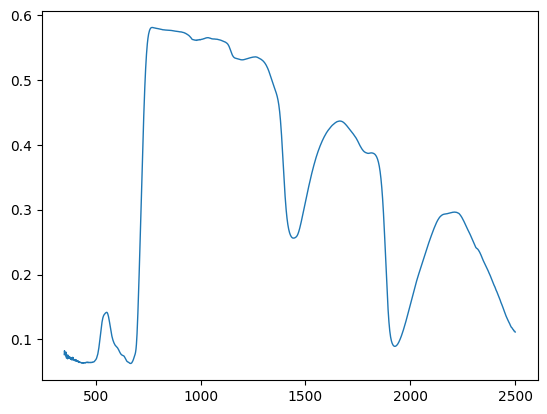

In [6]:
s = lm.read(filepath, True)
plt.plot(s.measurement.index, s.measurement, label=f'{filepath}', lw=1)

In [25]:
lm.build_UPWINS_ASD_database('data/', DeployToMongoDB=True)

Adding UPWINS convention filenames and metadata to data/filenames_asd.csv
Number of rows before dropping non-target_vegetation: 3614
Number of rows dropped: 147
Number of rows before dropping duplicates: 3467
Writing to data/UPWINS_ASD_database.csv complete. There were 3459 unique files.
Length of data list: 3459
Pinged your deployment. You successfully connected to MongoDB!
Metadata doc count:  3459
Data doc count:  3459
Spectral Library created.
